In [50]:
# Install the required libraries
!pip install prophet

In [375]:
# Import the required libraries and dependencies
import pandas as pd
from prophet import Prophet
import datetime as dt
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [377]:
mortality_df = pd.read_csv('resources\cleaned.csv')

mortality_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1451146 entries, 0 to 1451145
Data columns (total 11 columns):
 #   Column         Non-Null Count    Dtype  
---  ------         --------------    -----  
 0   Year           1451146 non-null  int64  
 1   State          1451146 non-null  object 
 2   County         1451146 non-null  object 
 3   CauseOfDeath   1451146 non-null  object 
 4   MortalityRate  1451146 non-null  float64
 5   ConfLow        1451146 non-null  float64
 6   ConfHigh       1451146 non-null  float64
 7   AgeGroup       1451146 non-null  object 
 8   Race           1451146 non-null  object 
 9   Sex            1451146 non-null  object 
 10  LocationID     1451146 non-null  int64  
dtypes: float64(3), int64(2), object(6)
memory usage: 121.8+ MB


In [379]:
# Strip any leading/trailing spaces from column names
mortality_df.columns = mortality_df.columns.str.strip()

In [381]:
# Convert the 'Year' column to datetime, setting the month and day to January 1st

mortality_df['Year'] = pd.to_datetime(mortality_df['Year'], format='%Y')
print(mortality_df.dtypes)

Year             datetime64[ns]
State                    object
County                   object
CauseOfDeath             object
MortalityRate           float64
ConfLow                 float64
ConfHigh                float64
AgeGroup                 object
Race                     object
Sex                      object
LocationID                int64
dtype: object


In [383]:
# Set 'Year' as the index and sort the DataFrame by the index in ascending order

mortality_df.set_index('Year', inplace=True)

mortality_df.sort_index(ascending=True, inplace=True)

In [385]:
#Display the first and last five of the data columns

display(mortality_df.head())
display(mortality_df.tail())

,State,County,CauseOfDeath,MortalityRate,ConfLow,ConfHigh,AgeGroup,Race,Sex,LocationID
Year,,,,,,,,,,
2010-01-01,IL,Fayette,Heart failure,428.1,368.7,494.0,Ages 65 years and older,Overall,Overall,17051
2010-01-01,NE,Cass,All heart disease,117.2,93.6,139.4,Ages 35-64 years,Overall,Men,31025
2010-01-01,TX,Travis,Coronary heart disease (CHD),32.9,28.1,40.0,Ages 35-64 years,Hispanic,Overall,48453
2010-01-01,IL,Kane,All stroke,264.4,232.2,291.5,Ages 65 years and older,Overall,Women,17089
2010-01-01,OH,Hamilton,Cardiovascular disease (CVD),181.5,167.8,197.6,Ages 35-64 years,Overall,Men,39061


,State,County,CauseOfDeath,MortalityRate,ConfLow,ConfHigh,AgeGroup,Race,Sex,LocationID
Year,,,,,,,,,,
2019-01-01,OK,Washita,Heart failure,26.4,16.7,42.0,Ages 35-64 years,White,Overall,40149
2019-01-01,TX,Upshur,All heart disease,238.4,204.1,273.0,Ages 35-64 years,Overall,Men,48459
2019-01-01,IL,Jackson,Coronary heart disease (CHD),412.8,362.2,471.0,Ages 65 years and older,Overall,Overall,17077
2019-01-01,TX,Upshur,Cardiovascular disease (CVD),142.3,120.4,167.9,Ages 35-64 years,Overall,Women,48459
2019-01-01,WY,Weston,Heart failure,478.2,408.0,564.6,Ages 65 years and older,White,Overall,56045


C:\Users\ifons\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\ifons\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\ifons\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\ifons\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

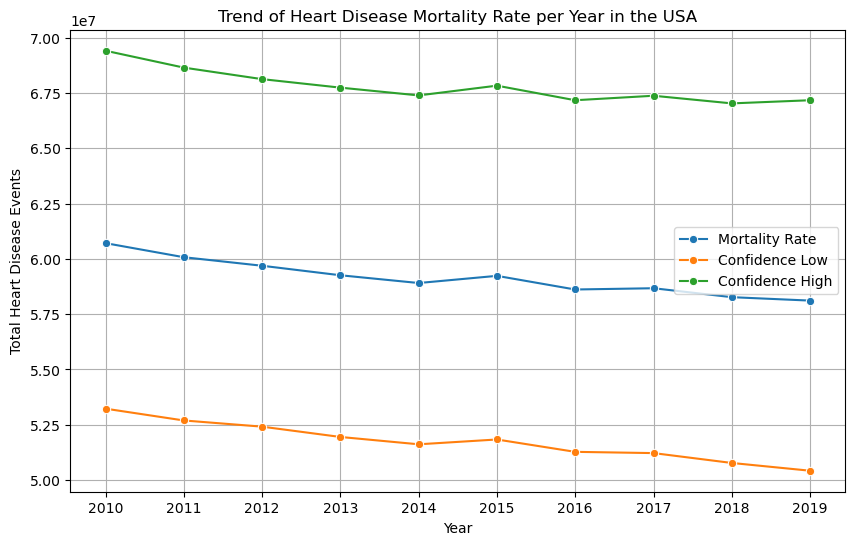

In [407]:
# sum the mortality df events per 'Year' & 'State' for all the USA events

yearly_mortality = mortality_df.groupby('Year')[['MortalityRate', 'ConfLow', 'ConfHigh']].sum().reset_index()


# Plot the data trend
color_pal = sns.color_palette()
plt.figure(figsize=(10, 6))
sns.lineplot(data=yearly_mortality, x='Year', y='MortalityRate', label='Mortality Rate', marker='o')
sns.lineplot(data=yearly_mortality, x='Year', y='ConfLow', label='Confidence Low', marker='o')
sns.lineplot(data=yearly_mortality, x='Year', y='ConfHigh', label='Confidence High', marker='o')
plt.title('Trend of Heart Disease Mortality Rate per Year in the USA')
plt.xlabel('Year')
plt.ylabel('Total Heart Disease Events')
plt.legend()
plt.grid(True)

# Save the plot as a JPG file
plt.savefig('output/heart_disease_mortality_trend.jpg', format='jpg')

# Show the plot
plt.show()


In [409]:
display(yearly_mortality.head())
display(yearly_mortality.tail())

,Year,MortalityRate,ConfLow,ConfHigh
0,2010-01-01,60711825.9,53228695.6,69411019.3
1,2011-01-01,60076102.0,52695650.8,68648224.4
2,2012-01-01,59690637.1,52415974.2,68127284.2
3,2013-01-01,59259606.4,51949196.4,67742020.5
4,2014-01-01,58909224.9,51617803.3,67391039.6


,Year,MortalityRate,ConfLow,ConfHigh
5,2015-01-01,59233259.3,51835438.3,67831406.6
6,2016-01-01,58616299.9,51276687.8,67172652.2
7,2017-01-01,58673314.1,51219943.8,67375447.1
8,2018-01-01,58269534.4,50774064.0,67029986.5
9,2019-01-01,58114257.5,50423297.9,67172348.7


In [391]:
# Reset index for plotting

mortality_df.reset_index(inplace=True)

C:\Users\ifons\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\ifons\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


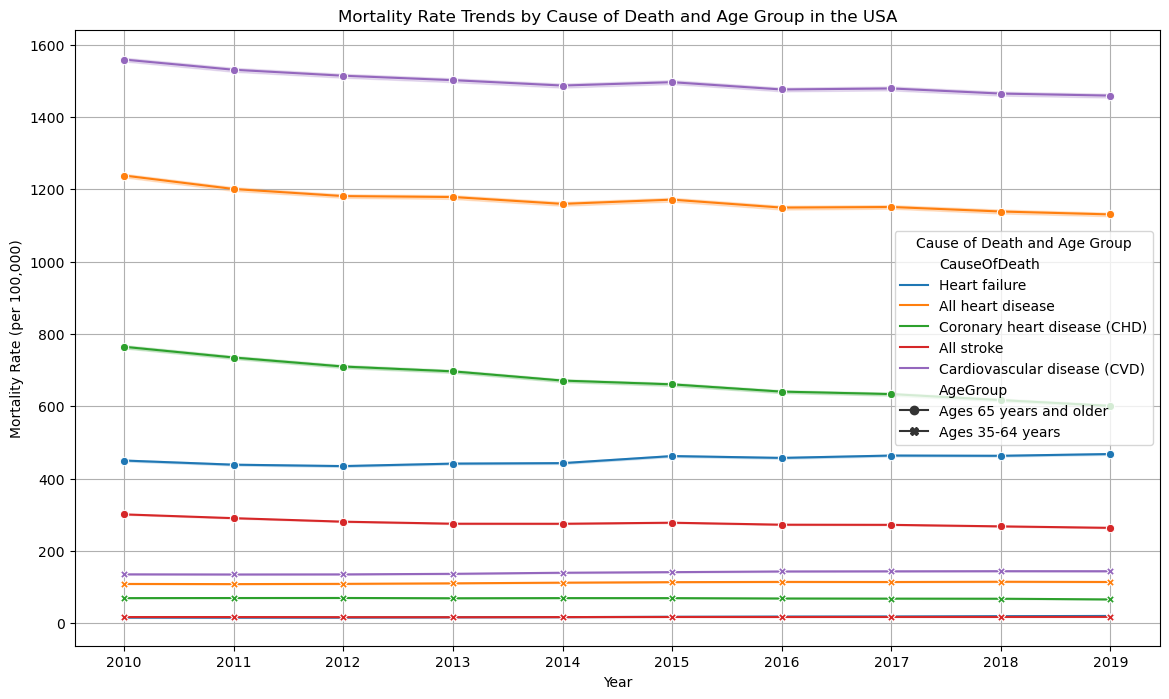

In [393]:
# Set 'Year' and 'AgeGroup' as the index
mortality_df.set_index(['Year', 'AgeGroup'], inplace=True)


# Plot the data

plt.figure(figsize=(14, 8))
sns.lineplot(data=mortality_df, x='Year', y='MortalityRate', hue='CauseOfDeath', style='AgeGroup', markers=True, dashes=False)
plt.title('Mortality Rate Trends by Cause of Death and Age Group in the USA')
plt.xlabel('Year')
plt.ylabel('Mortality Rate (per 100,000)')
plt.grid(True)
plt.legend(title='Cause of Death and Age Group')
plt.savefig('output\Mortality Rate Trends by Cause of Death and Age Group in the USA.jpg', format='jpg')
plt.show()

In [254]:
# Using the mortality_df. DataFrame, reset the index so the date information is no longer the index
prophet_df = mortality_df.reset_index()


# Label the columns ds and y so that the syntax is recognized by Prophet

prophet_df.columns = ['ds','y']
